In [1]:
import pandas as pd
pd.set_option('display.max_colwidth',1000)

url = "https://raw.githubusercontent.com/JulienAlardot/challenge-collecting-data/main/Data/database.csv"

df = pd.read_csv(url)

df[df["Locality"] == 2910].head()

,Unnamed: 0,Url,Source,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Area,...,Terrace Area,Garden,Garden Area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Province,Region
2871,2871,https://www.logic-immo.be/fr/vente/appartements-a-vendre/essen-2910/duplex-3-chambres-512793e4-366e-635c-9bd2-b95cb9d31f4a.html,logic-immo.be,2910,apartment,duplex,314999.0,regular sale,3.0,206.0,...,20.0,1.0,340.0,340.0,340.0,NaN,0.0,NaN,Antwerp,Vlaams
13172,13172,https://www.logic-immo.be/fr/vente/maisons-a-vendre/essen-2910/maison--511b5f1a-c41a-7a36-939e-1eb18c443549.html,logic-immo.be,2910,house,NaN,NaN,regular sale,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Antwerp,Vlaams
13173,13173,https://www.logic-immo.be/fr/vente/maisons-a-vendre/essen-2910/villa-3-chambres-1762b2a7-c112-ade4-3488-f825db8d6f21.html,logic-immo.be,2910,house,villa,494999.0,regular sale,3.0,240.0,...,NaN,1.0,700.0,927.0,927.0,NaN,0.0,NaN,Antwerp,Vlaams
23596,23596,https://www.immoweb.be/fr/annonce/triplex/a-vendre/essen/2910/9114772,immoweb,2910,apartment,triplex,315000.0,regular sale,4.0,206.0,...,12.0,1.0,340.0,NaN,NaN,NaN,0.0,good,Antwerp,Vlaams
25676,25676,https://www.immoweb.be/fr/annonce/appartement/a-vendre/essen/2910/9236086,immoweb,2910,apartment,NaN,189000.0,regular sale,2.0,88.0,...,10.0,0.0,NaN,NaN,NaN,2.0,0.0,good,Antwerp,Vlaams


In [2]:
df = pd.read_csv("info_house.csv")
df = df.dropna(subset=["property_location_number"])
df["property_location_number"] = df["property_location_number"].astype(int)
df["address"] = df["property_location_street"].astype(str) + " " + df["property_location_number"].astype(str) + ", " + df["property_location_postalCode"].astype(str) + " " + df["property_location_locality"].astype(str)
list_address = df["address"].to_list()
df["address"].to_csv("address.csv")

In [3]:
print(list_address)

['Nollekensstraat 18, 2910 Essen', 'Karamelstraat 18, 2910 Essen', 'Deken Verbiststraat 3, 2910 Essen', 'Kraaienberg 40, 2910 Essen', 'Grensstraat 2, 2910 Essen', 'Nieuwstraat 106, 2910 Essen', 'Kerkstraat 66, 2910 Essen', 'Molenstraat 21, 2910 Essen', 'Velodreef 48, 2910 Essen', 'kerkstraat 9, 2910 Essen', 'Sint-Jansstraat 18, 2910 Essen', 'Hendrik Consciencelaan 45, 2910 Essen']


In [4]:
df.columns

Index(['id', 'property_location_country', 'property_location_region',
       'property_location_province', 'property_location_district',
       'property_location_locality', 'property_location_postalCode',
       'property_location_street', 'property_location_number',
       'property_location_latitude', 'property_location_longitude',
       'property_type', 'property_subtype', 'property_bedroomCount',
       'property_showerRoomCount', 'property_bathroomCount',
       'property_netHabitableSurface', 'property_roomCount',
       'property_building_condition', 'property_building_constructionYear',
       'property_building_facadeCount', 'property_propertyCertificates',
       'property_constructionPermit_floodZoneType',
       'property_constructionPermit_hasPossiblePriorityPurchaseRight',
       'property_constructionPermit_totalBuildableGroundFloorSurface',
       'property_energy_heatingType', 'property_energy_hasHeatPump',
       'property_energy_hasPhotovoltaicPanels',
       'prop

In [5]:
df_address = df[df["address"] == 'Nollekensstraat 18, 2910 Essen']
test = df_address["property_terraceSurface"].values[0]
print(test)

nan


In [6]:
df["property_land_surface"]

0        0.0
1        0.0
2      761.0
3     1781.0
4      190.0
5        NaN
6     1250.0
7      345.0
8      928.0
9        NaN
12     110.0
14     564.0
Name: property_land_surface, dtype: float64

In [9]:
if isinstance(df_address["property_terraceSurface"].values[0], int):
    terrace_area = df_address["property_terraceSurface"].values[0]
else:
    terrace_area = 0
print(terrace_area)

0


In [1]:
liste = [['156000-241000.tif', '156000-240000.tif', '157000-241000.tif', '157000-240000.tif'], ['156000-241000.tif', '156000-240000.tif', '157000-241000.tif', '157000-240000.tif'], ['156000-240000.tif', '156000-239000.tif'], ['158000-240000.tif', '159000-240000.tif'], ['156000-241000.tif', '156000-240000.tif'], ['156000-241000.tif', '156000-240000.tif'], ['156000-240000.tif'], ['156000-240000.tif'], ['154000-239000.tif', '154000-238000.tif', '155000-239000.tif', '155000-238000.tif'], ['155000-240000.tif', '155000-239000.tif', '156000-240000.tif', '156000-239000.tif'], ['156000-236000.tif'], ['155000-239000.tif']]
liste_int = []
for i in liste:
    for j in i:
        liste_int.append(j)
liste_final = set(liste_int)
print(sorted(liste_final))

['154000-238000.tif', '154000-239000.tif', '155000-238000.tif', '155000-239000.tif', '155000-240000.tif', '156000-236000.tif', '156000-239000.tif', '156000-240000.tif', '156000-241000.tif', '157000-240000.tif', '157000-241000.tif', '158000-240000.tif', '159000-240000.tif']


TypeError: Image data of dtype <U7 cannot be converted to float

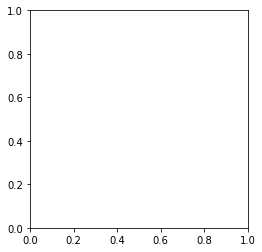

In [1]:
import rasterio
from rasterio.plot import show
dtm = "chm.tif"
src = rasterio.open(dtm)
show(dtm)